<a href="https://colab.research.google.com/github/AleAguirreM/LEA3_Health/blob/main/e_analisis_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import joblib ### para cargar array

########Paquetes para NN #########
import tensorflow as tf
from sklearn import metrics ### para analizar modelo
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
### cargar bases_procesadas ####
x_train = joblib.load('/content/drive/MyDrive/TB_Chest_Radiography_Database/salidas/x_train.pkl')
y_train = joblib.load('/content/drive/MyDrive/TB_Chest_Radiography_Database/salidas/y_train.pkl')
x_test = joblib.load('/content/drive/MyDrive/TB_Chest_Radiography_Database/salidas/x_test.pkl')
y_test = joblib.load('/content/drive/MyDrive/TB_Chest_Radiography_Database/salidas/y_test.pkl')

In [5]:
#### Escalar ######################
x_train = x_train.astype('float32') ## para poder escalarlo
x_test = x_test.astype('float32') ## para poder escalarlo
x_train /= 255 ### escalaro para que quede entre 0 y 1
x_test /= 255

In [6]:
##### cargar modelo  ######

modelocnn=joblib.load("/content/drive/MyDrive/TB_Chest_Radiography_Database/salidas/cnn_model.pkl")

27/27 [==============================] - 2s 86ms/step


Text(0.5, 1.0, 'probabilidades imágenes en entrenamiento')

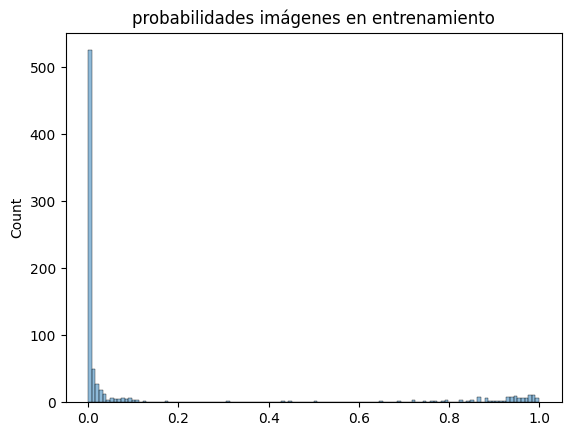

In [17]:
####desempeño en evaluación para grupo 1 (tienen tuberculosis) #######
prob1=modelocnn.predict(x_test)
sns.histplot(prob1, legend=False)
plt.title("probabilidades imágenes en entrenamiento")### conocer el comportamiento de las probabilidades para revisar threshold

27/27 [==============================] - 2s 87ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       700
           1       0.98      0.94      0.96       140

    accuracy                           0.99       840
   macro avg       0.99      0.97      0.98       840
weighted avg       0.99      0.99      0.99       840



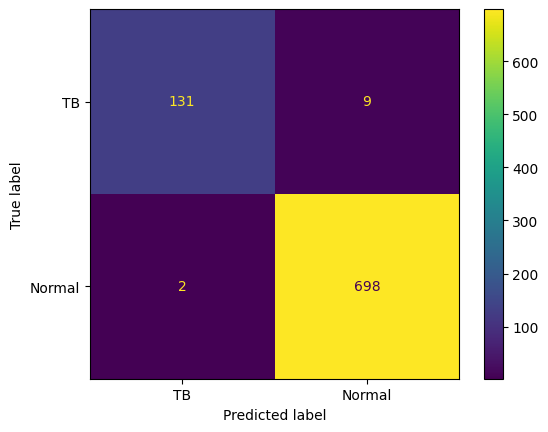

In [13]:
threshold_neu=0.60

pred_test=(modelocnn.predict(x_test)>=threshold_neu).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['TB', 'Normal'])
disp.plot()

Para los que tienen tuberculosis en evaluación.

- Precision: el 98% de los que predecimos que tenían
tuberculosis, efectivamente la tienen.

- Recall: de los que tenían tuberculosis identificamos al 94%.

- F1_score: promedio de recall/precision es del 96%.

- Accuracy: De todos los que predecimos, acertamos el 99%.

El modelo propuesto identificará al 94% de los pacientes con tuberculosis de forma automática, con un error del 2% en pacientes identificados con tuberculosis.

105/105 [==============================] - 6s 55ms/step


Text(0.5, 1.0, 'probabilidades imágenes en entrenamiento')

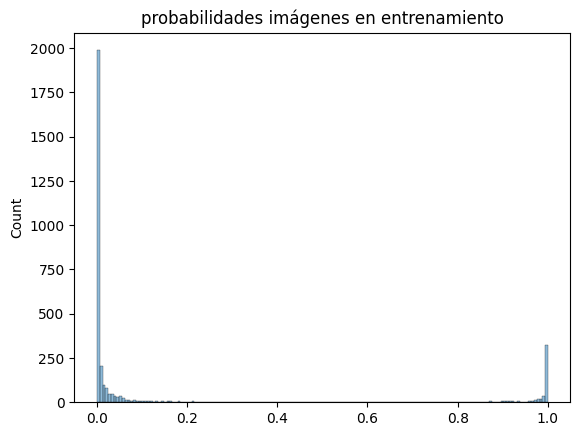

In [15]:
### desempeño en entrenamiento #####
prob2=modelocnn.predict(x_train)
sns.histplot(prob2, legend=False)
plt.title("probabilidades imágenes en entrenamiento")### conocer el comportamiento de las probabilidades para revisar threshold

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2800
           1       0.98      0.96      0.97       560

    accuracy                           0.99      3360
   macro avg       0.99      0.98      0.98      3360
weighted avg       0.99      0.99      0.99      3360



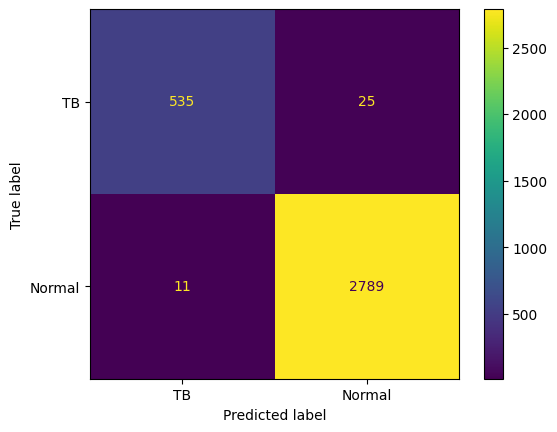

In [16]:
pred_train=(prob2>=threshold_neu).astype('int')
print(metrics.classification_report(y_train, pred_train))
cm=metrics.confusion_matrix(y_train,pred_train, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['TB', 'Normal'])
disp.plot()

27/27 [==============================] - 1s 52ms/step


Text(0.5, 1.0, 'probabilidades imágenes en entrenamiento')

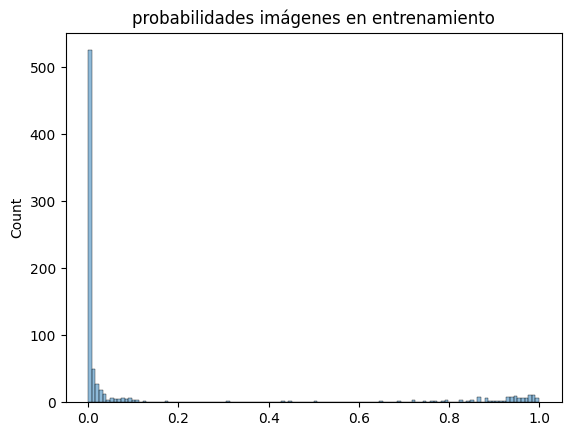

In [18]:
########### ##############################################################
####desempeño en evaluación para grupo 2 (No tienen tuberculosis) #######
########### ##############################################################

prob3=modelocnn.predict(x_test)
sns.histplot(prob3, legend=False)
plt.title("probabilidades imágenes en entrenamiento")### conocer el comportamiento de las probabilidades para revisar threshold

27/27 [==============================] - 2s 86ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       700
           1       0.91      0.97      0.94       140

    accuracy                           0.98       840
   macro avg       0.95      0.98      0.96       840
weighted avg       0.98      0.98      0.98       840



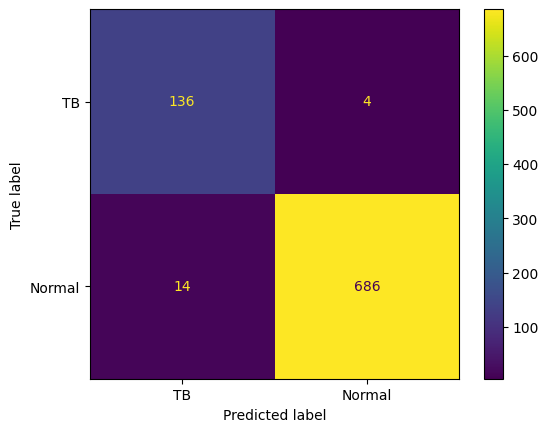

In [27]:
threshold_no_neu=0.30

pred_test=(modelocnn.predict(x_test)>=threshold_no_neu).astype('int')
print(metrics.classification_report(y_test, pred_test))
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['TB', 'Normal'])
disp.plot()

Para los que tienen tuberculosis en entrenamiento.

- Precision: el 99% de los que predecimos que tenían
tuberculosis, efectivamente la tienen.

- Recall: de los que tenían tuberculosis identificamos al 98%.

- F1_score: promedio de recall/precision es del 99%.

- Accuracy: De todos los que predecimos, acertamos el 98%.

El modelo propuesto identificará al 94% de los pacientes sin tuberculosis de forma automática, con un error del 1% en pacientes identificados sin tuberculosis.

105/105 [==============================] - 10s 94ms/step


Text(0.5, 1.0, 'probabilidades imágenes en entrenamiento')

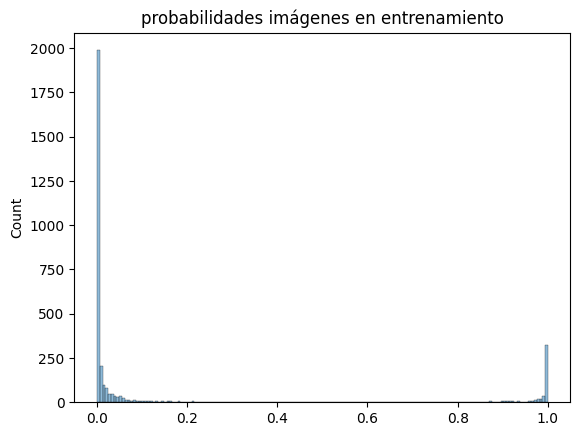

In [23]:
### desempeño en entrenamiento #####
prob4=modelocnn.predict(x_train)
sns.histplot(prob4, legend=False)
plt.title("probabilidades imágenes en entrenamiento")### conocer el comportamiento de las probabilidades para revisar threshold

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2800
           1       0.95      0.98      0.96       560

    accuracy                           0.99      3360
   macro avg       0.97      0.99      0.98      3360
weighted avg       0.99      0.99      0.99      3360



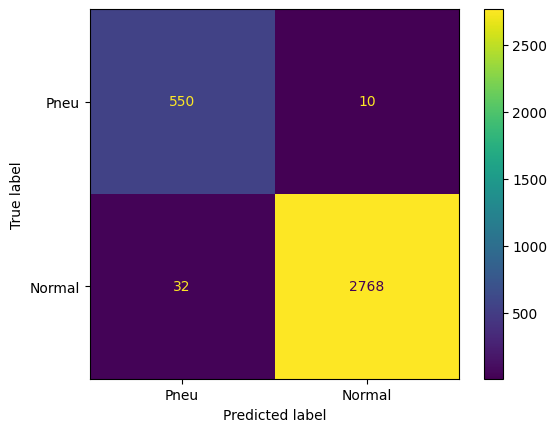

In [25]:
pred_train=(prob4>=threshold_no_neu).astype('int')
print(metrics.classification_report(y_train, pred_train))
cm=metrics.confusion_matrix(y_train,pred_train, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['Pneu', 'Normal'])
disp.plot()

In [28]:
####### clasificación final ################

prob5=modelocnn.predict(x_test)

clas=['TB' if prob5 >0.60 else 'No TB' if prob5 <0.30 else "No ident" for prob5 in prob5]

clases, count =np.unique(clas, return_counts=True)

count*100/np.sum(count)

27/27 [==============================] - 1s 51ms/step


array([82.14285714,  2.02380952, 15.83333333])

El modelo indentificará tres grupos de pacientes:

- El 82% de los pacientes detectados con tuberculosis por el modelo.

- El 3% de pacientes detectados como sin tuberculosis por el modelo.

- El 15% de pacientes que seguirán el procedimiento actual.